In [22]:
import pandas as pd
import seaborn as sns

In [23]:
df = pd.read_csv("data.csv")
df.rename(columns=lambda x: x[0].lower() + x.strip().lower().replace(' ', '_')[1:], inplace=True)
df = df.convert_dtypes()
df

,2025_rank,2024_rank,institution_name,location,location_full,size,academic_reputation,employer_reputation,faculty_student,citations_per_faculty,international_faculty,international_students,international_research_network,employment_outcomes,sustainability,qs_overall_score
0,1,1,Massachusetts Institute of Technology (MIT),US,United States,M,100.0,100.0,100.0,100.0,99.3,86.8,96.0,100.0,99.0,100
1,2,6,Imperial College London,UK,United Kingdom,L,98.5,99.5,98.2,93.9,100.0,99.6,97.4,93.4,99.7,98.5
2,3,3,University of Oxford,UK,United Kingdom,L,100.0,100.0,100.0,84.8,98.1,97.7,100.0,100.0,85.0,96.9
3,4,4,Harvard University,US,United States,L,100.0,100.0,96.3,100.0,74.1,69.0,99.6,100.0,84.4,96.8
4,5,2,University of Cambridge,UK,United Kingdom,L,100.0,100.0,100.0,84.6,100.0,94.8,99.3,100.0,84.8,96.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1498,1401+,1201-1400,University of Montana Missoula,US,United States,M,3.0,2.2,10.6,6.1,1.3,1.9,6.5,3.1,1.0,-
1499,1401+,1401+,University of Oradea,RO,Romania,L,5.6,2.2,4.0,1.9,1.5,5.2,34.5,6.2,2.3,-
1500,1401+,1201-1400,University of San Carlos,PH,Philippines,M,7.2,9.4,3.3,1.8,2.1,2.1,6.4,9.6,1.0,-
1501,1401+,1401+,"University Politehnica of Timisoara, UPT",RO,Romania,L,4.1,4.2,7.2,3.9,1.4,2.5,18.6,3.9,1.1,-


In [24]:
print(len(df))
print(len(df.columns))

1503
16


In [25]:
print(df.dtypes)

2025_rank                         string[python]
2024_rank                         string[python]
institution_name                  string[python]
location                          string[python]
location_full                     string[python]
size                              string[python]
academic_reputation                      Float64
employer_reputation                      Float64
faculty_student                          Float64
citations_per_faculty                    Float64
international_faculty                    Float64
international_students                   Float64
international_research_network           Float64
employment_outcomes                      Float64
sustainability                           Float64
qs_overall_score                  string[python]
dtype: object


In [26]:
df.describe()

,academic_reputation,employer_reputation,faculty_student,citations_per_faculty,international_faculty,international_students,international_research_network,employment_outcomes,sustainability
count,1503.0,1503.0,1503.0,1503.0,1403.0,1445.0,1502.0,1503.0,1484.0
mean,20.28656,19.786693,28.128676,23.50346,30.725374,25.580346,50.129095,23.825083,24.309299
std,22.32623,23.784986,27.613017,27.870692,34.328935,31.098689,29.866588,27.351315,31.074718
min,1.3,1.1,1.0,1.0,1.0,1.0,1.0,1.2,1.0
25%,6.3,4.3,7.3,2.8,4.2,2.9,22.725,4.0,1.3
50%,11.0,9.4,16.0,9.9,12.5,9.6,51.1,11.8,6.75
75%,23.5,25.3,40.4,36.4,51.6,38.3,77.1,33.4,39.5
max,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0


In [27]:
#Potential questions about the data: 
#- Does the country you go to college in influence your career prospects?
    #Bar chart separated by country
#- Are colleges in certain countries or regions have more international populations? Is this different for students vs. faculty? 
    #Bubble map?
#- What country produces the most universities in the top 100 ranked universities?
    #Bar chart of counts within the top 100 separated by country
#- does institution size influence international research networks or employment outcomes?
    #Line or scatter plot
#- what university characteristic most correlates with employment outcomes?
    #Chord diagram
    #Heat map

In [28]:
#Does the country you go to college in influnence your career prospects?
#create new df with relevant variables
df_career = pd.DataFrame()
columns_career = ['location', 'employer_reputation', 'citations_per_faculty', 'international_research_network', 'employment_outcomes']
df_career[columns_career] = df[columns_career]

#group by location and average each variable
grouped_by_location = df_career.groupby('location').mean()

#show each df
df_career
grouped_by_location

,employer_reputation,citations_per_faculty,international_research_network,employment_outcomes
location,,,,
AE,21.7,18.333333,41.166667,22.366667
AM,2.9,1.3,20.0,87.4
AR,13.676,1.62,19.424,19.664
AT,18.0125,18.7875,64.2125,30.6875
AU,27.036842,60.8,73.657895,27.642105
...,...,...,...,...
UY,13.75,1.25,18.8,28.75
UZ,17.85,1.75,10.2,17.75
VE,20.4,1.442857,11.016667,19.6


In [29]:
#sort each variable in descending order
reputation = grouped_by_location.sort_values(by='employer_reputation', ascending=False)
citations = grouped_by_location.sort_values(by='citations_per_faculty', ascending=False)
research_network = grouped_by_location.sort_values(by='international_research_network', ascending=False)
employment_outcomes = grouped_by_location.sort_values(by='employment_outcomes', ascending=False)

grouped_by_location

,employer_reputation,citations_per_faculty,international_research_network,employment_outcomes
location,,,,
AE,21.7,18.333333,41.166667,22.366667
AM,2.9,1.3,20.0,87.4
AR,13.676,1.62,19.424,19.664
AT,18.0125,18.7875,64.2125,30.6875
AU,27.036842,60.8,73.657895,27.642105
...,...,...,...,...
UY,13.75,1.25,18.8,28.75
UZ,17.85,1.75,10.2,17.75
VE,20.4,1.442857,11.016667,19.6


I will first look at how country influences career outcomes outside of academia by looking at career outcomes and employer reputations.

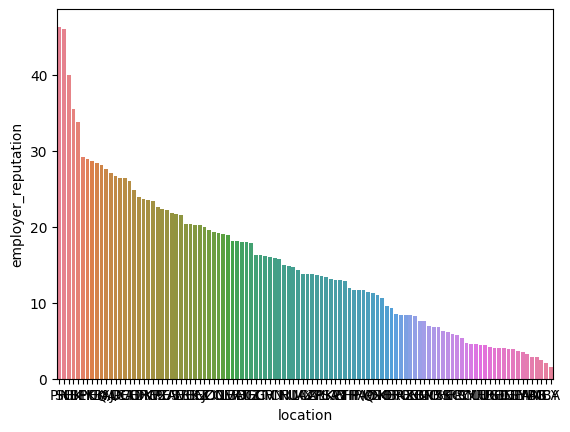

In [30]:
# plot employer reputation bar chart
sns.barplot(
    x="location", 
    y="employer_reputation", 
    data=reputation, 
    estimator=sum, 
    errorbar=None, 
    hue='location');

based on this, i would want to look more into this upper range of countries that have a significantly higher employer reputation rating than other countries

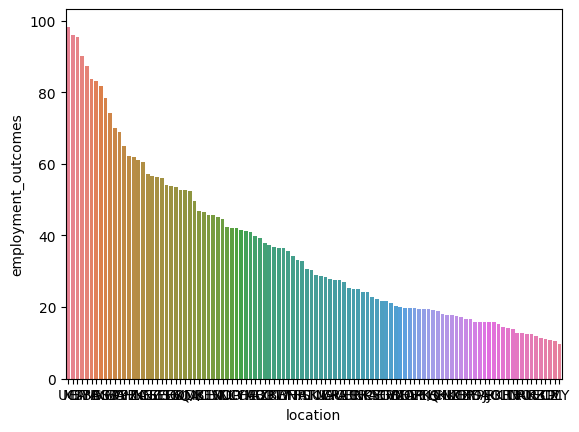

In [31]:
# plot employment_outcomes bar chart
sns.barplot(
    x="location", 
    y="employment_outcomes", 
    data=employment_outcomes, 
    estimator=sum, 
    errorbar=None, 
    hue='location');

If the student is more interested in going into research or academic work, I will do different visualizations to determine what schools might be best based on variables for the number of citations each faculty has, or how many international networking connections schools in this country generally offer. 

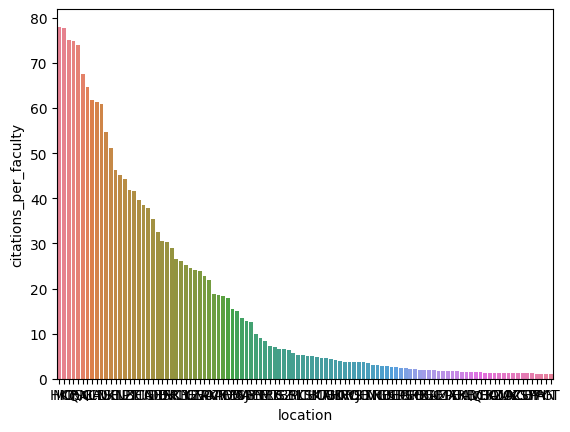

In [32]:
# plot citations_per_faculty bar chart
sns.barplot(
    x="location", 
    y="citations_per_faculty", 
    data=citations, 
    estimator=sum, 
    errorbar=None, 
    hue='location');

For this one, there also seems to be a breakaway group above 70 citations for faculty. I would want to look more into a smaller subset of these countries to see what these outliers are and recommend these to the student.

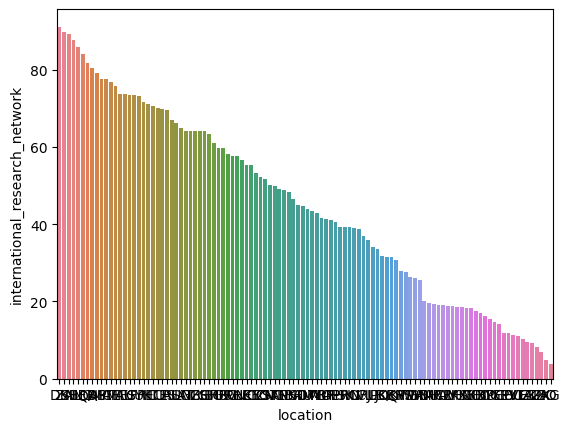

In [33]:
# plot international_research_network bar chart
sns.barplot(
    x="location", 
    y="international_research_network", 
    data=research_network, 
    estimator=sum, 
    errorbar=None, 
    hue='location');